# Постановка задачи

Решаем [эту](https://trainmydata.com/c/occupancy_detection) задачку с TrainMyData

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
%matplotlib inline

## Загружаем данные

In [2]:
!wget -P data/ https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip

--2018-06-05 04:11:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
Resolving archive.ics.uci.edu... 128.195.10.249
Connecting to archive.ics.uci.edu|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335713 (328K) [application/zip]
Saving to: ‘data/occupancy_data.zip’

occupancy_data.zip  100%[===================>] 327.84K   196KB/s    in 1.7s    

2018-06-05 04:11:28 (196 KB/s) - ‘data/occupancy_data.zip’ saved [335713/335713]



In [3]:
!unzip -d data/ data/occupancy_data.zip

Archive:  data/occupancy_data.zip
  inflating: data/datatest.txt       
  inflating: data/datatest2.txt      
  inflating: data/datatraining.txt   


## Организуем датасет

In [4]:
dtrain = pd.read_csv('data/datatraining.txt', sep=',')
dtest = pd.read_csv('data/test.csv', sep=',')

In [5]:
# allFiles = ['data/datatest2.txt', 'data/datatest.txt']
# frame = pd.DataFrame()
# list_ = []
# for file_ in allFiles:
#     df = pd.read_csv(file_, sep=',')
#     list_.append(df)
# dtest = pd.concat(list_)

In [6]:
dtrain.corr()['Occupancy'].abs().sort_values(ascending=False)

Occupancy        1.000000
Light            0.907352
CO2              0.712235
Temperature      0.538220
HumidityRatio    0.300282
Humidity         0.132964
Name: Occupancy, dtype: float64

## Удалим лишнее, добавим имя колонке ...

In [7]:
# dtrain = dtrain.drop(['date', 'Humidity'], axis=1)
# dtest = dtest.drop(['date', 'Humidity', 'Occupancy'], axis=1)
dtest.index.name = 'id'
x = dtrain.drop(['Occupancy'], axis=1)
y = dtrain['Occupancy']

In [8]:
cols_x = ['Temperature', 'Light', 'CO2', 'HumidityRatio']

## Логистическая регрессия

In [9]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=1) 
model = LogisticRegression()
model = model.fit(x_train[cols_x], y_train)

In [10]:
y_pred = model.predict(x_valid[cols_x])

Accuracy: 0.989255564083


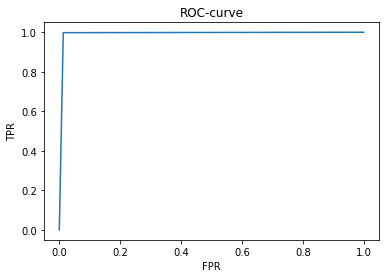

In [11]:
print('Accuracy:', metrics.accuracy_score(y_pred, y_valid))
fpr, tpr, _ = metrics.roc_curve(y_score=y_pred, y_true=y_valid)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')
plt.show()

In [12]:
y_pred = model.predict(dtest[cols_x])
dtest['value'] = y_pred
dtest.to_csv('data/ResultLogRegression.csv')
dtest.head()

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,value
id,,,,,,,,
0,0,12.02.2015,22.315000,26.55,461.50,548.000000,0.004425,1
1,1,12.02.2015,22.290000,26.55,454.00,546.250000,0.004418,1
2,2,12.02.2015,22.323333,26.60,454.00,542.666667,0.004436,1
3,3,12.02.2015,22.290000,26.60,454.00,543.333333,0.004427,1
4,4,12.02.2015,22.315000,26.60,450.25,551.750000,0.004433,1


## Решающее дерево

In [13]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.81, random_state=1) 
model = DecisionTreeClassifier()
model = model.fit(x_train[cols_x], y_train)

In [14]:
y_pred = model.predict(x_valid[cols_x])

Accuracy: 0.989539114615


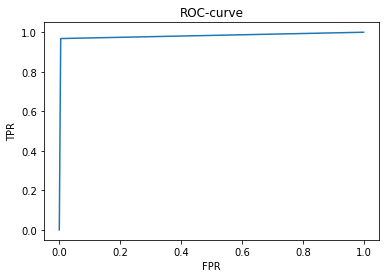

In [15]:
print('Accuracy:', metrics.accuracy_score(y_pred, y_valid))
fpr, tpr, _ = metrics.roc_curve(y_score=y_pred, y_true=y_valid)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')
plt.show()

In [16]:
y_pred = model.predict(dtest[cols_x])
dtest['value'] = y_pred
dtest.to_csv('data/ResultDecisionTree.csv')
dtest.head()

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,value
id,,,,,,,,
0,0,12.02.2015,22.315000,26.55,461.50,548.000000,0.004425,0
1,1,12.02.2015,22.290000,26.55,454.00,546.250000,0.004418,0
2,2,12.02.2015,22.323333,26.60,454.00,542.666667,0.004436,0
3,3,12.02.2015,22.290000,26.60,454.00,543.333333,0.004427,0
4,4,12.02.2015,22.315000,26.60,450.25,551.750000,0.004433,0


## Ну и еще немного поиграем

In [17]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=1) 
model = RandomForestClassifier(n_estimators=3, min_samples_split=2, random_state=1)
model = model.fit(x_train[cols_x], y_train)

In [18]:
y_pred = model.predict(x_valid[cols_x])

Accuracy: 0.995702885206


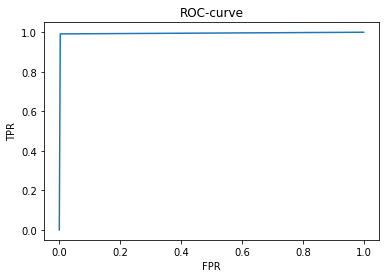

In [19]:
print('Accuracy:', metrics.accuracy_score(y_pred, y_valid))
fpr, tpr, _ = metrics.roc_curve(y_score=y_pred, y_true=y_valid)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')
plt.show()

In [20]:
y_pred = model.predict(dtest[cols_x])
dtest['value'] = y_pred
dtest.to_csv('data/ResultRandomForest.csv')
dtest.head()

,id,date,Temperature,Humidity,Light,CO2,HumidityRatio,value
id,,,,,,,,
0,0,12.02.2015,22.315000,26.55,461.50,548.000000,0.004425,1
1,1,12.02.2015,22.290000,26.55,454.00,546.250000,0.004418,1
2,2,12.02.2015,22.323333,26.60,454.00,542.666667,0.004436,1
3,3,12.02.2015,22.290000,26.60,454.00,543.333333,0.004427,1
4,4,12.02.2015,22.315000,26.60,450.25,551.750000,0.004433,1
